In [448]:
import numpy as np
import pandas as pd
#import re
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statistics
#from sklearn.linear_model import LinearRegression

In [449]:
df=pd.read_csv("output.csv",encoding='latin-1')
df.head()

,Option Name,Contact,Address,Size,Rent,Monthly Fees,One Time Fees,Pet Policy,Distance,Duration,...,Amenities,Features,Living Space,Lease Info,Services,Property Info,Indoor Info,Outdoor Info,Images,Description
0,"[b""b'Dobie Twenty21 Student Spaces'""](https://...",844-839-9998,"[2021-2025 Guadalupe St, Austin, TX 78705](htt...",NaN,"$899 - 2,850",NaN,NaN,NaN,NaN,NaN,...,"b""b'* Alumni Lounge\\n* Iconic Dobie Mall and ...","b""b'* Air Conditioning\\n* Heating\\n* Cable R...","b""b'* Views\\n* Walk-In Closets\\n* Furnished'""","b""b'4 - 15 Month Leases'""","b""b'* Package Service\\n* Laundry Facilities\\...","b""b'* Built in 1972\\n* Renovated in Jan 1998\...","b""b'* Elevator\\n* Business Center\\n* Clubhou...","b""b'* Courtyard\\n* Picnic Area'""",NaN,NaN
1,"[b""b'Cliffs at Barton Creek'""](https://www.apa...",844-214-7810,"[3050 Tamarron Blvd, Austin, TX 78746](https:/...","b""b'769 Sq Ft'""","$1,513 - 3,209",NaN,NaN,"b""b'Dogs and Cats Allowed\\n275, 375 & 475 non...",NaN,NaN,...,"b""b'* Air Conditioner\\n* BBQ/Picnic Area\\n* ...","b""b'* High Speed Internet Access'""",NaN,"b""b'3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14'""","b""b'* Package Service\\n* Laundry Facilities\\...","b""b'* Built in 1994\\n* 210 Units/3 Stories'""","b""b'* Business Center\\n* Clubhouse'""","b""b'* Gated\\n* Sundeck'""",NaN,NaN
2,"[b""b'Camden Rainey Street'""](https://www.apart...",844-822-3708,"[91 Rainey St, Austin, TX 78701](https://www.g...","b""b'799 Sq Ft'""","$1,779 - 3,139",NaN,NaN,"b""b'Dogs and Cats Allowed:\\nAt Camden, your p...",NaN,NaN,...,"b""b'* 24-hour emergency maintenance\\n* Barbeq...","b""b'* Air Conditioning'""",NaN,"b""b'Variable'""",NaN,"b""b'* Built in 2016\\n* 326 Units/8 Stories'""","b""b'* Elevator\\n* Business Center\\n* Clubhou...","b""b'* Sundeck'""",NaN,NaN
3,"[b""b'Radius On Grove'""](https://www.apartments...",844-866-7235,"[2301 Grove Blvd, Austin, TX 78741](https://ww...","b""b'840 Sq Ft'""","$1,200 - 1,729",NaN,NaN,"b""b'Dogs and Cats Allowed:\\nWe welcome 2 pets...",NaN,NaN,...,"b""b'* 10 ft. Ceiling\\n* Conference Center\\n*...","b""b'* High Speed Internet Access\\n* Washer/Dr...","b""b'* Hardwood Floors\\n* Carpet\\n* Tile Floo...","b""b'None'""","b""b'* Package Service\\n* Wi-Fi at Pool and Cl...","b""b'* Built in 2016\\n* 156 Units/3 Stories'""","b""b'* Business Center\\n* Clubhouse\\n* Lounge...","b""b'* Gated\\n* Cabana\\n* Grill\\n* Balcony\\...",NaN,NaN
4,"[b""b'Flatiron Domain'""](https://www.apartments...",844-271-5372,"[10727 Domain Dr, Austin, TX 78758](https://ww...","b""b'718 Sq Ft'""","$1,401 - 4,640",NaN,NaN,"b""b'Dogs and Cats Allowed:\\nWe welcome 2 pets...",NaN,NaN,...,"b""b'* Bike Storage\\n* Clubroom with Billards\...","b""b'* Washer/Dryer\\n* Air Conditioning\\n* Ce...","b""b'* Hardwood Floors\\n* Tile Floors\\n* Walk...","b""b'None'""","b""b'* Package Service\\n* Controlled Access\\n...","b""b'* Built in 2019\\n* 364 Units/5 Stories'""","b""b'* Elevator\\n* Business Center\\n* Clubhou...","b""b'* Courtyard\\n* Grill'""",NaN,NaN


In [450]:
temp_df = df["Rent"].str.split(" - ", n = 1, expand = True)
df["Rent_low"] = temp_df[0]
df["Rent_high"] = temp_df[1]
df.Rent_low = df.Rent_low.str.replace("$", "")
df.Rent_low = df.Rent_low.str.replace(",", "")
df.Rent_high = df.Rent_high.str.replace(",", "")
df = df[df.Rent_low != "Call for Rent"]
df.Rent_low = df.Rent_low.astype("float")
df.Rent_high = df.Rent_high.astype("float")

In [451]:
#df.head()

In [452]:
df["Zip"] = df.Address.str.extract(pat = '(TX 7....)')
df.Zip = df.Zip.str.replace("TX ", "")
df.Zip = df.Zip.astype("int")

In [453]:
df.head()

,Option Name,Contact,Address,Size,Rent,Monthly Fees,One Time Fees,Pet Policy,Distance,Duration,...,Lease Info,Services,Property Info,Indoor Info,Outdoor Info,Images,Description,Rent_low,Rent_high,Zip
0,"[b""b'Dobie Twenty21 Student Spaces'""](https://...",844-839-9998,"[2021-2025 Guadalupe St, Austin, TX 78705](htt...",NaN,"$899 - 2,850",NaN,NaN,NaN,NaN,NaN,...,"b""b'4 - 15 Month Leases'""","b""b'* Package Service\\n* Laundry Facilities\\...","b""b'* Built in 1972\\n* Renovated in Jan 1998\...","b""b'* Elevator\\n* Business Center\\n* Clubhou...","b""b'* Courtyard\\n* Picnic Area'""",NaN,NaN,899.0,2850.0,78705
1,"[b""b'Cliffs at Barton Creek'""](https://www.apa...",844-214-7810,"[3050 Tamarron Blvd, Austin, TX 78746](https:/...","b""b'769 Sq Ft'""","$1,513 - 3,209",NaN,NaN,"b""b'Dogs and Cats Allowed\\n275, 375 & 475 non...",NaN,NaN,...,"b""b'3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14'""","b""b'* Package Service\\n* Laundry Facilities\\...","b""b'* Built in 1994\\n* 210 Units/3 Stories'""","b""b'* Business Center\\n* Clubhouse'""","b""b'* Gated\\n* Sundeck'""",NaN,NaN,1513.0,3209.0,78746
2,"[b""b'Camden Rainey Street'""](https://www.apart...",844-822-3708,"[91 Rainey St, Austin, TX 78701](https://www.g...","b""b'799 Sq Ft'""","$1,779 - 3,139",NaN,NaN,"b""b'Dogs and Cats Allowed:\\nAt Camden, your p...",NaN,NaN,...,"b""b'Variable'""",NaN,"b""b'* Built in 2016\\n* 326 Units/8 Stories'""","b""b'* Elevator\\n* Business Center\\n* Clubhou...","b""b'* Sundeck'""",NaN,NaN,1779.0,3139.0,78701
3,"[b""b'Radius On Grove'""](https://www.apartments...",844-866-7235,"[2301 Grove Blvd, Austin, TX 78741](https://ww...","b""b'840 Sq Ft'""","$1,200 - 1,729",NaN,NaN,"b""b'Dogs and Cats Allowed:\\nWe welcome 2 pets...",NaN,NaN,...,"b""b'None'""","b""b'* Package Service\\n* Wi-Fi at Pool and Cl...","b""b'* Built in 2016\\n* 156 Units/3 Stories'""","b""b'* Business Center\\n* Clubhouse\\n* Lounge...","b""b'* Gated\\n* Cabana\\n* Grill\\n* Balcony\\...",NaN,NaN,1200.0,1729.0,78741
4,"[b""b'Flatiron Domain'""](https://www.apartments...",844-271-5372,"[10727 Domain Dr, Austin, TX 78758](https://ww...","b""b'718 Sq Ft'""","$1,401 - 4,640",NaN,NaN,"b""b'Dogs and Cats Allowed:\\nWe welcome 2 pets...",NaN,NaN,...,"b""b'None'""","b""b'* Package Service\\n* Controlled Access\\n...","b""b'* Built in 2019\\n* 364 Units/5 Stories'""","b""b'* Elevator\\n* Business Center\\n* Clubhou...","b""b'* Courtyard\\n* Grill'""",NaN,NaN,1401.0,4640.0,78758


In [454]:
#df[df.Zip == 78759].head()
df.columns

Index(['Option Name', 'Contact', 'Address', 'Size', 'Rent', 'Monthly Fees',
       'One Time Fees', 'Pet Policy', 'Distance', 'Duration', 'Parking', 'Gym',
       'Kitchen', 'Amenities', 'Features', 'Living Space', 'Lease Info',
       'Services', 'Property Info', 'Indoor Info', 'Outdoor Info', 'Images',
       'Description', 'Rent_low', 'Rent_high', 'Zip'],
      dtype='object')

In [455]:
df.groupby("Zip").mean().head()

,Monthly Fees,One Time Fees,Distance,Duration,Images,Description,Rent_low,Rent_high
Zip,,,,,,,,
78610,NaN,NaN,NaN,NaN,NaN,NaN,990.250000,2439.000000
78613,NaN,NaN,NaN,NaN,NaN,NaN,1010.227273,2204.909091
78620,NaN,NaN,NaN,NaN,NaN,NaN,1099.000000,1656.500000
78621,NaN,NaN,NaN,NaN,NaN,NaN,913.000000,1187.000000
78630,NaN,NaN,NaN,NaN,NaN,NaN,1445.000000,1490.000000


In [456]:
#zip_count = df[["Size","Zip"]].groupby("Zip")
zip_count = df.groupby("Zip").count()
zip_count["Option Name"].sort_values()

Zip
78737     1
78621     1
78630     1
78641     1
78645     1
78653     1
78721     1
78620     2
78734     2
78634     3
78732     3
78724     3
78610     4
78730     4
78747     4
78722     4
78738     5
78736     6
78756     6
78746     7
78681     7
78665     9
78750     9
78731    10
78726    11
78757    11
78702    11
78701    12
78754    12
78749    12
78735    14
78703    14
78717    14
78752    15
78727    15
78723    15
78705    16
78729    17
78748    18
78751    19
78744    20
78728    21
78664    22
78613    22
78660    23
78745    24
78759    29
78753    33
78758    38
78704    40
78741    53
Name: Option Name, dtype: int64

In [457]:
df.loc[df["Zip"] == 78721, "Zip"] = 78723
df.loc[df["Zip"] == 78737, "Zip"] = 78749
df.loc[df["Zip"] == 78621, "Zip"] = 78653
df.loc[df["Zip"] == 78630, "Zip"] = 78613
df.loc[df["Zip"] == 78641, "Zip"] = 78613
df.loc[df["Zip"] == 78645, "Zip"] = 78613
df.loc[df["Zip"] == 78653, "Zip"] = 78749
df.loc[df["Zip"] == 78734, "Zip"] = 78732
df.loc[df["Zip"] == 78737, "Zip"] = 78739
df.loc[df["Zip"] == 78620, "Zip"] = 78732

In [458]:
df["Granite"] = df["Kitchen"].str.contains("Granite", na = False)
df["Stainless_Steel"] = df["Kitchen"].str.contains("Stainless Steel", na = False)
df["Hardwood_Floors"] = df["Living Space"].str.contains("Hardwood Floors", na = False)
df["GG_SS_HF"] = df["Granite"].astype("float") + df["Stainless_Steel"].astype("float") + df["Hardwood_Floors"].astype("float")
df["Island_Kitchen"] = df["Kitchen"].str.contains("Island Kitchen", na = False)
df["Fitness_Center"] = df["Gym"].str.contains("Fitness Center", na = False)
df["Pool"] = df["Gym"].str.contains("Pool", na = False)
df["Spa_Sauna"] = df["Gym"].str.contains("Spa|Sauna", na = False)
df["Downtown_View"] = df["Amenities"].str.contains("Downtown View", na = False)
df["Trash_Pickup"] = df["Services"].str.contains("Trash Pickup - Door to Door", na = False)
df["Clubhouse"] = df["Indoor Info"].str.contains("Clubhouse", na = False)
df["Cabana"] = df["Outdoor Info"].str.contains("Cabana", na = False)

In [459]:
df.head()

,Option Name,Contact,Address,Size,Rent,Monthly Fees,One Time Fees,Pet Policy,Distance,Duration,...,Hardwood_Floors,GG_SS_HF,Island_Kitchen,Fitness_Center,Pool,Spa_Sauna,Downtown_View,Trash_Pickup,Clubhouse,Cabana
0,"[b""b'Dobie Twenty21 Student Spaces'""](https://...",844-839-9998,"[2021-2025 Guadalupe St, Austin, TX 78705](htt...",NaN,"$899 - 2,850",NaN,NaN,NaN,NaN,NaN,...,False,0.0,False,True,True,False,False,False,True,False
1,"[b""b'Cliffs at Barton Creek'""](https://www.apa...",844-214-7810,"[3050 Tamarron Blvd, Austin, TX 78746](https:/...","b""b'769 Sq Ft'""","$1,513 - 3,209",NaN,NaN,"b""b'Dogs and Cats Allowed\\n275, 375 & 475 non...",NaN,NaN,...,False,0.0,False,True,True,False,True,False,True,False
2,"[b""b'Camden Rainey Street'""](https://www.apart...",844-822-3708,"[91 Rainey St, Austin, TX 78701](https://www.g...","b""b'799 Sq Ft'""","$1,779 - 3,139",NaN,NaN,"b""b'Dogs and Cats Allowed:\\nAt Camden, your p...",NaN,NaN,...,False,0.0,False,True,False,False,False,False,True,False
3,"[b""b'Radius On Grove'""](https://www.apartments...",844-866-7235,"[2301 Grove Blvd, Austin, TX 78741](https://ww...","b""b'840 Sq Ft'""","$1,200 - 1,729",NaN,NaN,"b""b'Dogs and Cats Allowed:\\nWe welcome 2 pets...",NaN,NaN,...,True,3.0,True,True,True,False,False,False,True,True
4,"[b""b'Flatiron Domain'""](https://www.apartments...",844-271-5372,"[10727 Domain Dr, Austin, TX 78758](https://ww...","b""b'718 Sq Ft'""","$1,401 - 4,640",NaN,NaN,"b""b'Dogs and Cats Allowed:\\nWe welcome 2 pets...",NaN,NaN,...,True,2.0,False,True,True,False,False,True,True,False


In [460]:
df["Built_year"] = df["Property Info"].str.extract(pat = '(Built in ....)')
#df["Reno_year"] = df["Property Info"].str.extract(pat = '(Renovated in ........)')
df.Built_year = df.Built_year.str.replace("Built in ", "")
df.Built_year = df.Built_year.astype("int")
#df.Reno_year = df.Reno_year.str.replace("Renovated in ", "")
#df.sort_values(by = "Built_year", ascending = False).head()
df["Built_year"]=df["Built_year"]-1900

In [461]:
df["Sq_ft"] = df["Size"].str[4:8]
df.Sq_ft = df.Sq_ft.str.replace(",", "")
df.Sq_ft = df.Sq_ft.str.strip().astype("float")

In [462]:
df[df.Sq_ft.isna()].head()

,Option Name,Contact,Address,Size,Rent,Monthly Fees,One Time Fees,Pet Policy,Distance,Duration,...,Island_Kitchen,Fitness_Center,Pool,Spa_Sauna,Downtown_View,Trash_Pickup,Clubhouse,Cabana,Built_year,Sq_ft
0,"[b""b'Dobie Twenty21 Student Spaces'""](https://...",844-839-9998,"[2021-2025 Guadalupe St, Austin, TX 78705](htt...",NaN,"$899 - 2,850",NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,False,True,False,72,NaN
6,"[b""b'Walden Square Homes'""](https://www.apartm...",844-587-1588,"[1420 Walden Pond Dr, Pflugerville, TX 78660](...",NaN,"$1,895 - 2,100",NaN,NaN,"b""b'Dogs Allowed:\\nNow your pet can relax by ...",NaN,NaN,...,True,False,False,False,False,False,False,False,118,NaN
106,"[b""b'Legacy Rental Homes'""](https://www.apartm...",844-232-7400,"[1108 Legacy Dr, Pflugerville, TX 78660](https...",NaN,"$2,145 - 2,395",NaN,NaN,"b""b'Dogs and Cats Allowed:\\nWe allow 2 pets p...",NaN,NaN,...,True,True,True,False,False,False,True,False,118,NaN
174,"[b""b'University Village at Austin'""](https://w...",844-819-4948,"[1301 Crossing Pl, Austin, TX 78741](https://w...",NaN,$655 - 815,NaN,NaN,"b""b'Dogs Allowed:\\nBreed restrictions apply T...",NaN,NaN,...,False,True,True,False,False,False,True,False,101,NaN
178,"[b""b'University Estates at Austin'""](https://w...",512-782-4989,"[1300 Crossing Pl, Austin, TX 78741](https://w...",NaN,$670 - 810,NaN,NaN,"b""b'Dogs and Cats Allowed:\\nWe are Pet-Friend...",NaN,NaN,...,False,True,True,True,False,False,True,False,97,NaN


In [463]:
df["Dollar_per_ft"] = df.Rent_low / df.Sq_ft
m = df.Dollar_per_ft.mean()
m

1.6710012889876373

In [464]:
#df.Dollar_per_ft.fillna(m, inplace = True)

In [465]:
#df_nans = df[df.Sq_ft.isna()]
#df_nans.Sq_ft = df_nans.Rent_low / df_nans.Dollar_per_ft
df.loc[df['Sq_ft'].isna(), "Sq_ft"] = df.loc[df['Sq_ft'].isna(), "Rent_low"] / m

In [466]:
#df[df.Sq_ft.isna()]
#help(df.drop)
df.drop(columns=["Dollar_per_ft"], inplace = True)

In [467]:
df.columns

Index(['Option Name', 'Contact', 'Address', 'Size', 'Rent', 'Monthly Fees',
       'One Time Fees', 'Pet Policy', 'Distance', 'Duration', 'Parking', 'Gym',
       'Kitchen', 'Amenities', 'Features', 'Living Space', 'Lease Info',
       'Services', 'Property Info', 'Indoor Info', 'Outdoor Info', 'Images',
       'Description', 'Rent_low', 'Rent_high', 'Zip', 'Granite',
       'Stainless_Steel', 'Hardwood_Floors', 'GG_SS_HF', 'Island_Kitchen',
       'Fitness_Center', 'Pool', 'Spa_Sauna', 'Downtown_View', 'Trash_Pickup',
       'Clubhouse', 'Cabana', 'Built_year', 'Sq_ft'],
      dtype='object')

In [468]:
#df_dummies = pd.get_dummies(df, columns = ["Zip"])
df_dummies = pd.get_dummies(df, columns = ["Zip"], drop_first = True)
#df_dummies.head()
#help(pd.get_dummies)

In [469]:
#df_dummies.info()

In [470]:
df_dummies.iloc[:,25:88].sort_values(by = "Sq_ft", ascending = False).head()
#df_dummies.iloc[:,25:39].sort_values(by = "Sq_ft", ascending = False).head()

,Granite,Stainless_Steel,Hardwood_Floors,GG_SS_HF,Island_Kitchen,Fitness_Center,Pool,Spa_Sauna,Downtown_View,Trash_Pickup,...,Zip_78749,Zip_78750,Zip_78751,Zip_78752,Zip_78753,Zip_78754,Zip_78756,Zip_78757,Zip_78758,Zip_78759
494,False,True,True,2.0,True,True,True,False,True,True,...,0,0,1,0,0,0,0,0,0,0
498,True,True,True,3.0,True,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
292,False,False,True,1.0,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
106,True,True,True,3.0,True,True,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
6,True,True,True,3.0,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [471]:
#regressors = list(range(25, 38)) + list(range(40, 89))
#regressors = list(range(25, (len(df_dummies.columns) - 1)))
#df_dummies.iloc[:,regressors].head()
#df_dummies.drop(columns=["GG_SS_HF"], inplace = True)
df_dummies.drop(columns=["Granite", "Stainless_Steel", "Hardwood_Floors"], inplace = True)
df_dummies.drop(columns=["Fitness_Center", "Spa_Sauna", "Trash_Pickup", "Cabana"], inplace = True)

regressors = list(range(25, len(df_dummies.columns)))

x = df_dummies.iloc[:,regressors]
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 0 to 654
Data columns (total 48 columns):
GG_SS_HF          646 non-null float64
Island_Kitchen    646 non-null bool
Pool              646 non-null bool
Downtown_View     646 non-null bool
Clubhouse         646 non-null bool
Built_year        646 non-null int64
Sq_ft             646 non-null float64
Zip_78613         646 non-null uint8
Zip_78634         646 non-null uint8
Zip_78660         646 non-null uint8
Zip_78664         646 non-null uint8
Zip_78665         646 non-null uint8
Zip_78681         646 non-null uint8
Zip_78701         646 non-null uint8
Zip_78702         646 non-null uint8
Zip_78703         646 non-null uint8
Zip_78704         646 non-null uint8
Zip_78705         646 non-null uint8
Zip_78717         646 non-null uint8
Zip_78722         646 non-null uint8
Zip_78723         646 non-null uint8
Zip_78724         646 non-null uint8
Zip_78726         646 non-null uint8
Zip_78727         646 non-null uint8
Zip_787

In [472]:
#x = df_dummies.iloc[:,32:100]
#x = df_dummies.iloc[:,25:82]
#regressors = list(range(25, len(df_dummies.columns)))

y = df["Rent_low"]

#model = LinearRegression().fit(x,y)
model = sm.OLS(y, x.astype(float))
results = model.fit()

In [473]:
#dfn = df_dummies.iloc[:,25:38]
dfn = df_dummies.iloc[:,25:32]
#dfn.head()
print(dfn.corr())

                GG_SS_HF  Island_Kitchen      Pool  Downtown_View  Clubhouse  \
GG_SS_HF        1.000000        0.436535  0.098124       0.027642   0.160418   
Island_Kitchen  0.436535        1.000000  0.117274       0.037779   0.194681   
Pool            0.098124        0.117274  1.000000       0.048126   0.393290   
Downtown_View   0.027642        0.037779  0.048126       1.000000   0.054268   
Clubhouse       0.160418        0.194681  0.393290       0.054268   1.000000   
Built_year      0.160261        0.386031  0.086913       0.046162   0.337557   
Sq_ft           0.031269        0.182641 -0.036879       0.078069   0.066820   

                Built_year     Sq_ft  
GG_SS_HF          0.160261  0.031269  
Island_Kitchen    0.386031  0.182641  
Pool              0.086913 -0.036879  
Downtown_View     0.046162  0.078069  
Clubhouse         0.337557  0.066820  
Built_year        1.000000  0.273682  
Sq_ft             0.273682  1.000000  


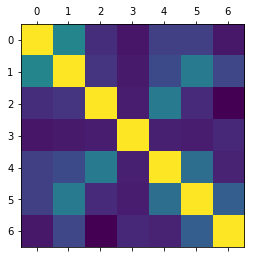

In [474]:
plt.matshow(dfn.corr())
plt.show()

In [475]:
#df_small=df_dummies.iloc[:,23:50]
#df_small.describe()

In [476]:
#model.score(x,y)
print(results.summary())
print(results.params)

                                 OLS Regression Results                                
Dep. Variable:               Rent_low   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              513.1
Date:                Tue, 10 Sep 2019   Prob (F-statistic):                        0.00
Time:                        21:02:45   Log-Likelihood:                         -4250.2
No. Observations:                 646   AIC:                                      8596.
Df Residuals:                     598   BIC:                                      8811.
Df Model:                          48                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [477]:
#model.coef_

In [478]:
#model.intercept_

In [479]:
#x_ind = range(0,10)
#x_ind = range(425,435)
#x_ind = range(325,340)
#x_pred_all = df_dummies[df_dummies.Zip_78701 == 1]
#x_pred = df_dummies.iloc[x_ind,25:80]
#x_pred_all = df_dummies
#x_pred = x_pred_all.iloc[:,regressors]
#x_pred.head()

In [480]:
#y_pred = model.predict(x_pred)
#y_pred[0:10]

In [481]:
#df["Predicted_rent_low"] = y_pred
df["Predicted_rent_low"] = results.fittedvalues
df["Delta"] = df.Predicted_rent_low - df.Rent_low

In [482]:
df.head()

,Option Name,Contact,Address,Size,Rent,Monthly Fees,One Time Fees,Pet Policy,Distance,Duration,...,Pool,Spa_Sauna,Downtown_View,Trash_Pickup,Clubhouse,Cabana,Built_year,Sq_ft,Predicted_rent_low,Delta
0,"[b""b'Dobie Twenty21 Student Spaces'""](https://...",844-839-9998,"[2021-2025 Guadalupe St, Austin, TX 78705](htt...",NaN,"$899 - 2,850",NaN,NaN,NaN,NaN,NaN,...,True,False,False,False,True,False,72,538.000782,893.175419,-5.824581
1,"[b""b'Cliffs at Barton Creek'""](https://www.apa...",844-214-7810,"[3050 Tamarron Blvd, Austin, TX 78746](https:/...","b""b'769 Sq Ft'""","$1,513 - 3,209",NaN,NaN,"b""b'Dogs and Cats Allowed\\n275, 375 & 475 non...",NaN,NaN,...,True,False,True,False,True,False,94,769.000000,1543.535424,30.535424
2,"[b""b'Camden Rainey Street'""](https://www.apart...",844-822-3708,"[91 Rainey St, Austin, TX 78701](https://www.g...","b""b'799 Sq Ft'""","$1,779 - 3,139",NaN,NaN,"b""b'Dogs and Cats Allowed:\\nAt Camden, your p...",NaN,NaN,...,False,False,False,False,True,False,116,799.000000,1884.616973,105.616973
3,"[b""b'Radius On Grove'""](https://www.apartments...",844-866-7235,"[2301 Grove Blvd, Austin, TX 78741](https://ww...","b""b'840 Sq Ft'""","$1,200 - 1,729",NaN,NaN,"b""b'Dogs and Cats Allowed:\\nWe welcome 2 pets...",NaN,NaN,...,True,False,False,False,True,True,116,840.000000,1325.434846,125.434846
4,"[b""b'Flatiron Domain'""](https://www.apartments...",844-271-5372,"[10727 Domain Dr, Austin, TX 78758](https://ww...","b""b'718 Sq Ft'""","$1,401 - 4,640",NaN,NaN,"b""b'Dogs and Cats Allowed:\\nWe welcome 2 pets...",NaN,NaN,...,True,False,False,True,True,False,119,718.000000,1272.482716,-128.517284


In [483]:
df.to_csv("result.csv")